# Homework 2 - Machine Learning and Computational Statistics
### Ilias Katsampalos

### Ex1
$R_x = cov(x) + \boldsymbol{μμ^Τ}$  
we have  
$cov(x) + \boldsymbol{μμ^Τ} = E[(\boldsymbol{x}-\boldsymbol{μ})(\boldsymbol{x}-\boldsymbol{μ})^T] + \boldsymbol{μμ^Τ} = E[(\boldsymbol{x}-\boldsymbol{μ})(\boldsymbol{x^Τ}-\boldsymbol{μ^Τ})] + \boldsymbol{μμ^Τ} 
= E[\boldsymbol{xx^T}-\boldsymbol{xμ^T} - \boldsymbol{μx^Τ}+\boldsymbol{μμ^Τ}] + \boldsymbol{μμ^Τ} = $  
$= E[\boldsymbol{xx^T}] - Ε[\boldsymbol{xμ^T}] - Ε[\boldsymbol{μx^Τ}] + Ε[\boldsymbol{μμ^Τ}] + \boldsymbol{μμ^Τ}
= E[\boldsymbol{xx^T}] - Ε[\boldsymbol{x}]\boldsymbol{μ^Τ} - \boldsymbol{μ}E[\boldsymbol{x^Τ}] + \boldsymbol{μμ^Τ} + \boldsymbol{μμ^Τ} = E[\boldsymbol{xx^T}] = R_x$

### Ex2
* **Bernouli Mean:** $E(x) = \sum_{j}x_jp(x_j) = 0(1-p)+p = p$  
* **Bernouli Variance:** $σ_x^2 = \sum_{j}(x_j - E[x_j])^2p(x_j) = (0-p)^2(1-p) + (1-p)^2p = p^2(1-p) +  (1-p)^2p = $  
$= p^2 - p^3 + p - 2p^2 + p^3 = p-p^2 = p(1-p)$
* **Binomial mean:** $E(x) = \sum_{x\inΩ_x}xp(x) = \sum_{x=0}^{n}x{n \choose x}p^x(1-p)^{n-x} = 
\sum_{x=0}^{n}{n \choose x-1}p^x(1-p)^{n-x} = \sum_{x=0}^{n}np{n-1 \choose x-1}p^{x-1}(1-p)^{n-x} = $  
$= np\sum_{x=0}^{n}{n-1 \choose x-1}p^{x-1}(1-p)^{n-x}$ and setting m = n-1, k = x-1  
$= np\sum_{k=0}^{m}{m \choose k}p^{k}(1-p)^{k-m} = np(p+1-p)^m = np$

### Ex3
$p(x) = \frac{1}{(2π)^{l/2}|Σ|^{1/2}} exp(-\frac{(x-μ)^TΣ^{-1}(x-μ)}{2})
=\frac{1}{(2π)^{l/2}|Σ|^{1/2}} exp\bigg(-\frac{1}{2}
\begin{bmatrix}
    (x_1-μ_1)&(x_2-μ_2)&...&(x_l-μ_l)
\end{bmatrix}
\begin{bmatrix}
    σ_{11}^{-2} & 0 & 0\\
    0 & \ddots & \\
    0 &  & σ_{ll}^{-2}
\end{bmatrix}
\begin{bmatrix}
    (x_1-μ_1) \\
    (x_2-μ_2) \\
    \vdots \\
    (x_l-μ_l)
\end{bmatrix}\bigg)
=\frac{1}{(2π)^{l/2}|Σ|^{1/2}} exp(-\frac{1}{2}[(x_1-μ_1)^2σ_{11}^{-2} + (x_2-μ_2)^2σ_{2}^{-2} + ... + (x_l-μ_l)^2σ_{ll}^{-2}]) = $  
$= 
\frac{1}{(2π)^{l/2}\prod_{i=1}^{l}σ_i}exp(-\frac{(x_1-μ_1)^2}{2σ_{11}^2}
-\frac{(x_2-μ_2)^2}{2σ_{22}^2}
-\frac{(x_l-μ_l)^2}{2σ_{ll}^2}) = 
\prod_{i=1}^{l}\frac{1}{\sqrt{2π}σ_i}exp(-\frac{(x_i-μ_i)^2}{2σ_i^2})
$

### Ex4
$J(θ) = \sum_{i=1}^{n}(θx_i - y_i)^2$  
$\frac{dJ(θ)}{dθ} = 2\sum_{i=1}^{n}(θx_i - y_i)x_i = 0 \Rightarrow \sum_{i=1}^{n}θx_i^2 - y_ix_i = 0 \Rightarrow
θ = \frac{\sum_{i=1}^{n}y_ix_i}{\sum_{i=1}^{n}x_i^2}
$

### Ex5

In [41]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#a) instead of a loop we will implement this in a vectorized fashion
np.random.seed(123)
#dimensions: 50 datasets with 30 rows each
n=30
d=50

#X is a matrix where each column is a dataset. The shape is (30,50)
X = np.random.uniform(50,100,(n,d))

#generate noise for each dataset, with 0 means, 64 variance and 30 rows. The shape is (30,50)
noise = np.random.multivariate_normal(np.zeros(50),np.identity(50)*64,30)

#scalar multiplication with theta=2 and add the noise. The shape is the same so no issues should arise
y = X * 2 + noise

In [42]:
#b) we calculate the thetas based on our proof in exercise 4
thetas = np.multiply(X,y).sum(axis=0) / np.multiply(X,X).sum(axis=0)
thetas

array([2.00484604, 2.02069017, 2.01496419, 2.01881608, 1.99798319,
       1.9993382 , 1.98850054, 2.01052471, 2.00033709, 2.00900794,
       1.99101986, 2.01018817, 1.99465841, 2.02448586, 1.99027242,
       2.01996748, 1.99547394, 1.9702183 , 2.03082518, 1.97737788,
       1.98862297, 1.99102609, 2.00269802, 1.96463306, 2.02044858,
       2.01819826, 1.9933806 , 1.98811222, 1.99128188, 2.0325274 ,
       2.0057673 , 2.00457314, 2.0009138 , 2.01988791, 2.01355743,
       1.99547892, 1.97825136, 2.02682088, 2.05746472, 1.98969355,
       2.00484434, 1.98490816, 1.97640402, 2.00635041, 1.98278824,
       2.00473082, 1.98971983, 2.00185306, 2.00739853, 2.00926102])

In [43]:
#c) calculate the mse of the estimator
MSE = np.sum((thetas-2)**2) / len(thetas)
print('MSE of the estimator is {}'.format(MSE))

MSE of the estimator is 0.0003048450645330764


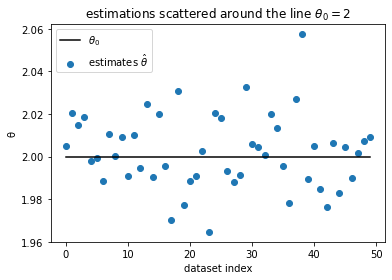

The estimates of each dataset are scattered around the θ0=2 line
There are deviations attributed to the noise η that we added to the model which generated the data


In [61]:
#plot the estimates of theta and how they spread around the theta0 estimator
plt.scatter(np.arange(0,50), thetas, label = 'estimates $\hat{θ}$')
plt.plot(np.arange(0,50), np.ones(50)*2, label = '$θ_0$', color = 'black')
plt.legend()
plt.xlabel('dataset index')
plt.ylabel('θ')
plt.title('estimations scattered around the line $θ_0=2$')
plt.show()
print('The estimates of each dataset are scattered around the θ0=2 line')
print('There are deviations attributed to the noise η that we added to the model which generated the data')

Theta estimates follow a normal distribution with mean 2.00242 and standard deviation 0.01729


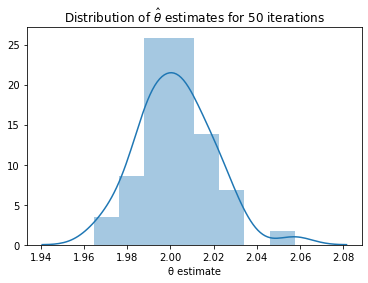

The mean is really close to the actual θ of the model. We could assume that the E[θhat] is an unbiased estimate of our parameter. By increasing the datasets as well as the size of each dataset,our estimate might approach 2 even better


In [62]:
#plot the distribuition of theta
sns.distplot(thetas)
plt.xlabel('θ estimate')
plt.title('Distribution of $\hat{θ}$ estimates for 50 iterations')
print('Theta estimates follow a normal distribution with mean {} and standard deviation {}'.format(
                                                                                                round(thetas.mean(),5)
                                                                                                ,round(thetas.std(),5)))
plt.show()
print('The mean is really close to the actual θ of the model. We could assume that the E[θhat] is an unbiased estimate of our parameter. By increasing the datasets as well as the size of each dataset,our estimate might approach 2 even better')
